In [1]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

# Ref: https://stackoverflow.com/questions/48610132/
#      tensorflow-crash-with-cudnn-status-alloc-failed/53707323#53707323
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_virtual_device_configuration(gpus[0], 
  [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3096)])

2.10.1
2.10.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype(np.float32) / 255
test_images = test_images.astype(np.float32) / 255

In [3]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [4]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, padding='same',input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2),strides=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dropout_1 (Dropout)         (None, 9216)              0         
                                                        

In [5]:
hist = model.fit(train_images, train_labels, batch_size=256, 
                 validation_data=(test_images, test_labels), epochs=50)

Epoch 1/50
235/235 [==============================] - 9s 12ms/step - loss: 0.5657 - accuracy: 0.7974 - val_loss: 0.3664 - val_accuracy: 0.8689
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.3583 - accuracy: 0.8715 - val_loss: 0.3063 - val_accuracy: 0.8864
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.3105 - accuracy: 0.8868 - val_loss: 0.2862 - val_accuracy: 0.8935
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2795 - accuracy: 0.8983 - val_loss: 0.2662 - val_accuracy: 0.9012
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2566 - accuracy: 0.9058 - val_loss: 0.2557 - val_accuracy: 0.9041
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2377 - accuracy: 0.9124 - val_loss: 0.2365 - val_accuracy: 0.9120
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2261 - accuracy: 0.9158 - val_loss: 0.2291 - val_accuracy: 0.9149

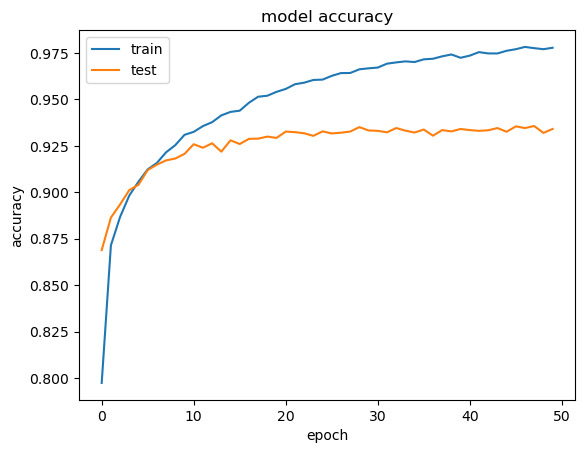

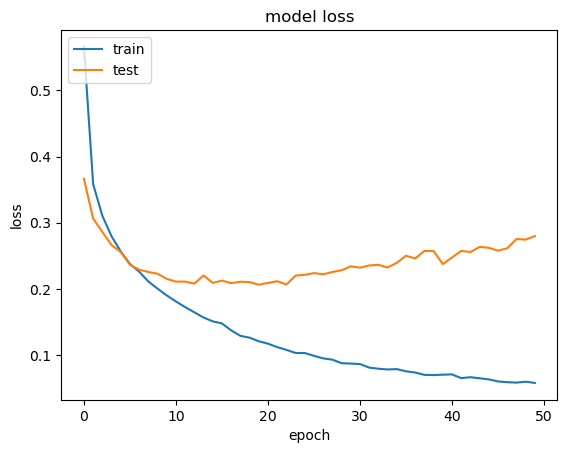

In [6]:
# plot accuracy history
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot loss history
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
type(hist.history['accuracy'])

list

In [8]:
max_train_acc = np.max(hist.history['accuracy'])
max_val_acc = np.max(hist.history['val_accuracy'])
print(max_train_acc)
print(max_val_acc)

0.9782666563987732
0.935699999332428


In [9]:
max(hist.history['accuracy'])

0.9782666563987732

In [10]:
hist.history['accuracy']

[0.7921500205993652,
 0.864633321762085,
 0.8809833526611328,
 0.8927833437919617,
 0.9021166563034058,
 0.9069333076477051,
 0.915233314037323,
 0.9186000227928162,
 0.9217166900634766,
 0.9262833595275879,
 0.9291499853134155,
 0.9334333539009094,
 0.9363999962806702,
 0.9396833181381226,
 0.9403333067893982,
 0.9434833526611328,
 0.9465333223342896,
 0.9490333199501038,
 0.9502000212669373,
 0.9532666802406311,
 0.9538833498954773,
 0.956083357334137,
 0.9574999809265137,
 0.9581000208854675,
 0.9615499973297119,
 0.961566686630249,
 0.9621833562850952,
 0.962933361530304,
 0.9649666547775269,
 0.9667999744415283,
 0.9657666683197021,
 0.9679166674613953,
 0.9685666561126709,
 0.9682333469390869,
 0.9698166847229004,
 0.9712833166122437,
 0.9712166786193848,
 0.9710333347320557,
 0.9719833135604858,
 0.9730333089828491,
 0.9733166694641113,
 0.9738166928291321,
 0.973633348941803,
 0.975433349609375,
 0.9751499891281128,
 0.9751166701316833,
 0.9754499793052673,
 0.9757999777793884,

In [1]:
# pip install pyyaml h5py

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.h5')

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()